# Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Import Dataset

In [4]:
game_stats = pd.read_csv('./data/game_stas.csv')
pd.set_option('display.max_columns', None)

# Data Cleaning

In [5]:
# Looking at data types of dataset
game_stats.dtypes

url                       object
round                      int64
home_team                 object
away_team                 object
goals_home_final           int64
goals_away_final           int64
final_result              object
goals_home_1half           int64
goals_away_1half           int64
1half_result              object
ball_possessionhome        int64
ball_possessionaway        int64
goal_attemptshome          int64
goal_attemptsaway          int64
shots_on_goalhome          int64
shots_on_goalaway          int64
shots_off_goalhome         int64
shots_off_goalaway         int64
blocked_shotshome          int64
blocked_shotsaway          int64
free_kickshome             int64
free_kicksaway             int64
corner_kickshome           int64
corner_kicksaway           int64
offsideshome               int64
offsidesaway               int64
throw_inshome            float64
throw_insaway            float64
goalkeeper_saveshome       int64
goalkeeper_savesaway       int64
foulshome 

## Treating Null's

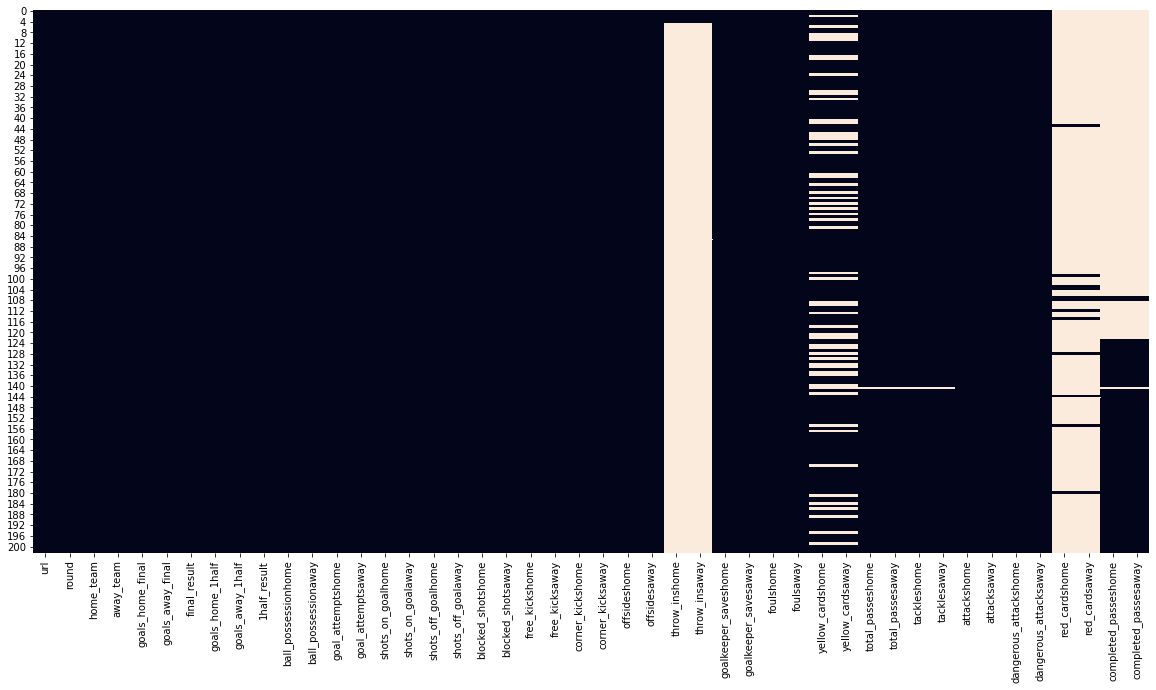

In [6]:
#Creating a heatmap of nulls
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(game_stats.isnull(), cbar=False);

In [7]:
# Filling NaN values with 0, because its a our webscrapping source, when these values do not occur, 
# the site does not show the output so it can be adopted as a zero value.
game_stats.fillna(0, inplace=True)

## Treating Object DataTypes

In [8]:
# Applying a function that change values of a Draw Match to 0, when Home team won to 1 and Away team won to -1.

def func(x):
    if x == 'Draw':
        return 0
    elif x == 'Home':
        return 1
    else:
        return -1


In [9]:
game_stats['final_result'] = game_stats['final_result'].apply(func)

In [10]:
game_stats['1half_result'] = game_stats['1half_result'].apply(func)

# Exploratory Data Analyzis

In [16]:
game_stats

,url,round,home_team,away_team,goals_home_final,goals_away_final,final_result,goals_home_1half,goals_away_1half,1half_result,ball_possessionhome,ball_possessionaway,goal_attemptshome,goal_attemptsaway,shots_on_goalhome,shots_on_goalaway,shots_off_goalhome,shots_off_goalaway,blocked_shotshome,blocked_shotsaway,free_kickshome,free_kicksaway,corner_kickshome,corner_kicksaway,offsideshome,offsidesaway,throw_inshome,throw_insaway,goalkeeper_saveshome,goalkeeper_savesaway,foulshome,foulsaway,yellow_cardshome,yellow_cardsaway,total_passeshome,total_passesaway,tackleshome,tacklesaway,attackshome,attacksaway,dangerous_attackshome,dangerous_attacksaway,red_cardshome,red_cardsaway,completed_passeshome,completed_passesaway
0,https://www.scoreboard.com/uk/match/OjVQbVCq/#...,26,Frankfurt,Monchengladbach,1,3,-1,0,2,-1,52,48,5,6,2,5,3,1,0,0,10,9,3,1,0,2,5.0,13.0,3,2,9,8,2.0,1.0,262.0,256.0,4.0,4.0,84,35,21,6,0.0,0.0,0.0,0.0
1,https://www.scoreboard.com/uk/match/lh3J4L02/#...,26,Augsburg,Wolfsburg,1,2,-1,0,1,-1,39,61,5,8,1,2,3,5,1,1,6,10,1,1,4,1,11.0,13.0,1,1,6,5,1.0,0.0,165.0,251.0,6.0,7.0,42,63,22,34,0.0,0.0,0.0,0.0
2,https://www.scoreboard.com/uk/match/I9hb3B4S/#...,26,Dortmund,Schalke,4,0,1,2,0,1,60,40,9,3,2,1,3,0,4,2,8,2,4,0,0,2,7.0,9.0,1,0,2,6,0.0,0.0,289.0,192.0,10.0,6.0,71,49,31,18,0.0,0.0,0.0,0.0
3,https://www.scoreboard.com/uk/match/A7XxdTd2/#...,26,Dusseldorf,Paderborn,0,0,0,0,0,0,55,45,4,4,1,1,2,2,1,1,9,9,1,0,2,0,8.0,8.0,1,1,8,9,1.0,1.0,306.0,241.0,8.0,5.0,44,51,25,24,0.0,0.0,0.0,0.0
4,https://www.scoreboard.com/uk/match/WGYYd9sd/#...,26,Hoffenheim,Hertha,0,3,-1,0,0,0,51,49,6,4,0,2,4,2,2,0,12,4,2,3,0,0,11.0,8.0,2,0,4,11,0.0,3.0,217.0,205.0,9.0,5.0,53,43,34,30,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,https://www.scoreboard.com/uk/match/zsNl9dW4/#...,1,Bremen,Dusseldorf,1,3,-1,0,1,-1,68,32,6,3,0,2,5,1,1,0,8,3,6,2,1,0,0.0,0.0,1,0,2,8,0.0,2.0,341.0,162.0,4.0,10.0,76,47,37,16,0.0,0.0,296.0,130.0
199,https://www.scoreboard.com/uk/match/6RbRie1U/#...,1,Dortmund,Augsburg,5,1,1,1,1,0,78,22,13,2,5,1,5,1,3,0,3,3,7,0,0,0,0.0,0.0,0,4,3,3,0.0,0.0,426.0,124.0,5.0,14.0,85,31,73,9,0.0,0.0,393.0,84.0
200,https://www.scoreboard.com/uk/match/EXLh8GoB/#...,1,Freiburg,Mainz,3,0,1,0,0,0,50,50,10,11,3,3,6,3,1,5,6,3,4,4,0,1,0.0,0.0,3,3,3,6,0.0,3.0,199.0,206.0,10.0,5.0,42,49,25,36,0.0,0.0,145.0,159.0
201,https://www.scoreboard.com/uk/match/WlQXCvXu/#...,1,Leverkusen,Paderborn,3,2,1,2,2,0,75,25,5,9,2,5,2,0,1,4,5,2,4,4,1,0,0.0,0.0,3,0,2,5,1.0,0.0,399.0,126.0,5.0,13.0,83,33,40,22,0.0,0.0,352.0,82.0


## Correlations

In [17]:
# Excluding object data types to deal with numerical data.
df_int = game_stats.select_dtypes(exclude='object')

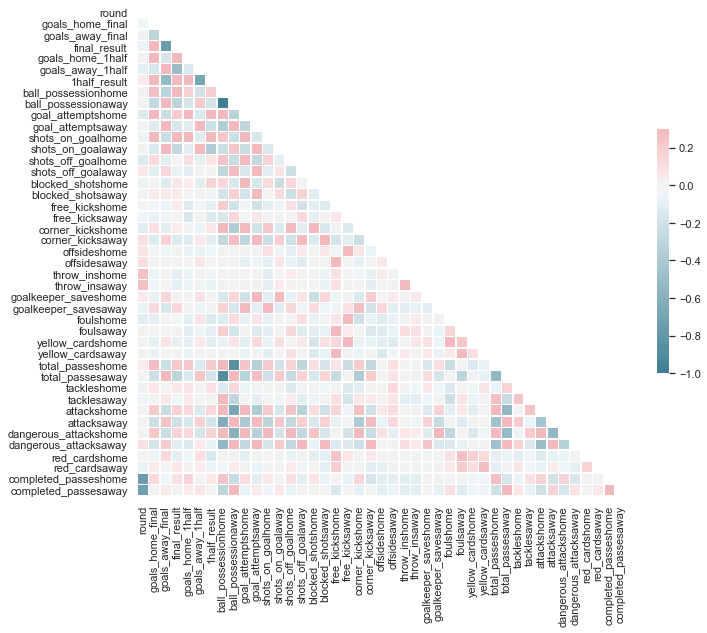

In [19]:
sns.set(style="white")

# Compute the correlation matrix
corr = df_int.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Looking at Final Results

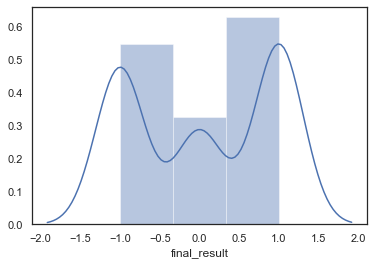

In [31]:
# Checking distribution about final result we can that at this league have more wins and looses than draws results.
sns.distplot(df_int['final_result'], )

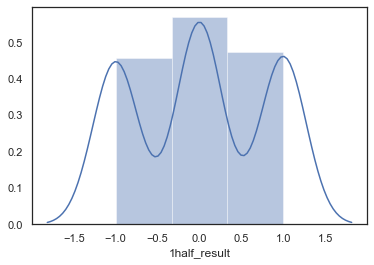

In [32]:
# Looking at these graphs, we can see that the tied results tend to be resolved in the second half. We will go deeper into these cases.
sns.distplot(df_int['1half_result'])

### How much ball possession can decide games?

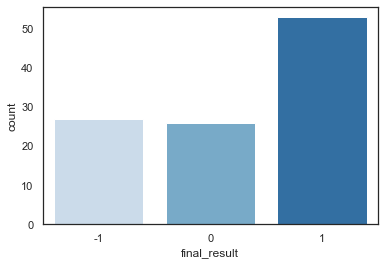

In [78]:
# If the home team has more ball possession than the visiting team, the history of the games is an important factor to win at the end of the game.
sns.countplot(df_int[(df_int['ball_possessionhome'] > df_int['ball_possessionaway'])]['final_result'], palette='Blues')

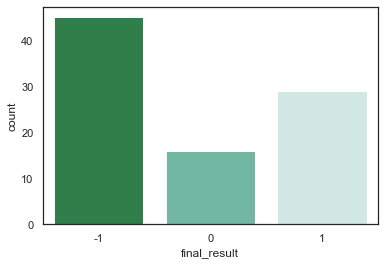

In [77]:
# In case the visiting team has more control of the ball, the case is repeated, but the number of ties decreases and the case of the home team increases, ending with victory.
sns.countplot(df_int[(df_int['ball_possessionaway'] > df_int['ball_possessionhome'])]['final_result'], palette='BuGn_r')

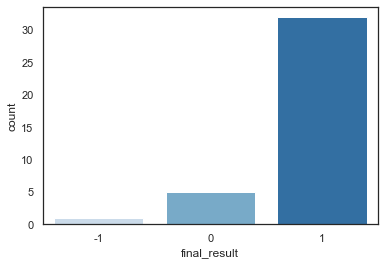

In [76]:
# If the home team has more ball than the visiting team and has more goals than the visiting team, by the game history is practically a victory or draw for the home team.
sns.countplot(df_int[(df_int['ball_possessionhome'] > df_int['ball_possessionaway']) & (df_int['goals_home_1half'] > df_int['goals_away_1half'])]['final_result'], palette='Blues')

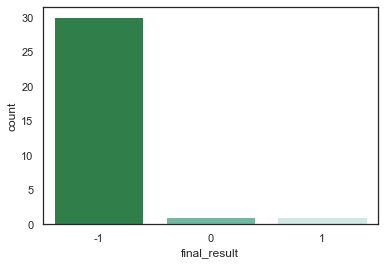

In [75]:
sns.countplot(df_int[(df_int['ball_possessionaway'] > df_int['ball_possessionhome']) & (df_int['goals_away_1half'] > df_int['goals_home_1half'])]['final_result'], palette='BuGn_r')

### Teams with the highest average ball possession, passes and dangerous attacks playing at home

In [243]:
#Teams plating at home

df.groupby(by='home_team')[['ball_possessionhome', 'total_passeshome', 'dangerous_attackshome']].mean().reset_index().sort_values(by='ball_possessionhome', ascending=False)

,home_team,ball_possessionhome,total_passeshome,dangerous_attackshome
1,Bayern,69.454545,359.636364,36.181818
10,Leverkusen,66.769231,340.769231,30.769231
3,Dortmund,61.700000,323.200000,32.800000
12,Monchengladbach,55.818182,258.181818,27.090909
14,RB Leipzig,55.416667,280.250000,24.833333
15,Schalke,53.400000,226.600000,24.400000
2,Bremen,52.600000,270.400000,22.900000
17,Wolfsburg,52.307692,230.384615,23.692308
9,Hoffenheim,51.000000,250.000000,16.727273
13,Paderborn,48.916667,211.500000,19.250000


In [244]:
# Teams playing at visitors

df.groupby(by='away_team')[['ball_possessionaway', 'total_passesaway', 'dangerous_attacksaway']].mean().reset_index().sort_values(by='ball_possessionaway', ascending=False)

,away_team,ball_possessionaway,total_passesaway,dangerous_attacksaway
1,Bayern,68.416667,345.583333,34.750000
10,Leverkusen,62.909091,317.545455,17.727273
3,Dortmund,60.000000,319.545455,21.181818
14,RB Leipzig,55.250000,283.000000,23.500000
12,Monchengladbach,53.000000,223.666667,19.166667
9,Hoffenheim,51.272727,254.181818,16.909091
7,Freiburg,48.461538,222.384615,17.000000
15,Schalke,47.750000,214.833333,18.666667
17,Wolfsburg,46.750000,196.750000,19.083333
6,Frankfurt,46.300000,198.900000,20.600000


### Checking who is winning first half and finish winning seccond half

In [87]:
df = game_stats.drop('url', axis=1)

In [194]:
df1 = df[(df['final_result'] == df['1half_result']) & (df['final_result'] == 1)].groupby(by='home_team').count()[['final_result']].reset_index().sort_values(by='final_result', ascending=False)

In [195]:
df1.head()

,home_team,final_result
1,Bayern,6
3,Dortmund,5
13,RB Leipzig,5
5,FC Koln,5
9,Leverkusen,5


In [173]:
df2 = df[(df['final_result'] == df['1half_result']) & (df['final_result'] == -1)].groupby(by='away_team').count()[['final_result']].reset_index().sort_values(by='final_result', ascending=False)

In [175]:
df2.head()

,away_team,final_result
1,Bayern,7
13,RB Leipzig,6
16,Wolfsburg,5
10,Leverkusen,5
12,Monchengladbach,4


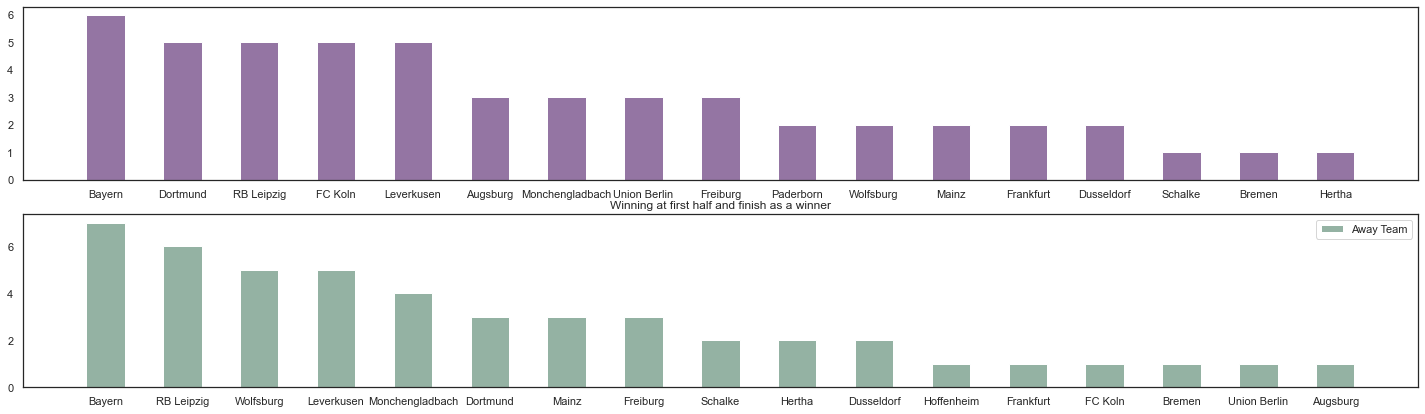

In [217]:

barWidth = 0.5

fig, ax = plt.subplots(2,1,figsize=(25,7))
ax[0].bar(df1['home_team'], df1['final_result'], width = barWidth, color = (0.3,0.1,0.4,0.6), label='Home Team')
ax[1].bar(df2['away_team'], df2['final_result'], width = barWidth, color = (0.3,0.5,0.4,0.6), label='Away Team')
plt.legend()
plt.title('Winning at first half and finish as a winner')
# Create legend

plt.show()

In [186]:
df3 = df[(df['final_result'] > df['1half_result']) & (df['1half_result'] == 0)].groupby(by='home_team').count()[['final_result']].reset_index().sort_values(by='final_result', ascending=False)

In [187]:
df4 = df[(df['final_result'] < df['1half_result']) & (df['1half_result'] == 0)].groupby(by='away_team').count()[['final_result']].reset_index().sort_values(by='final_result', ascending=False)

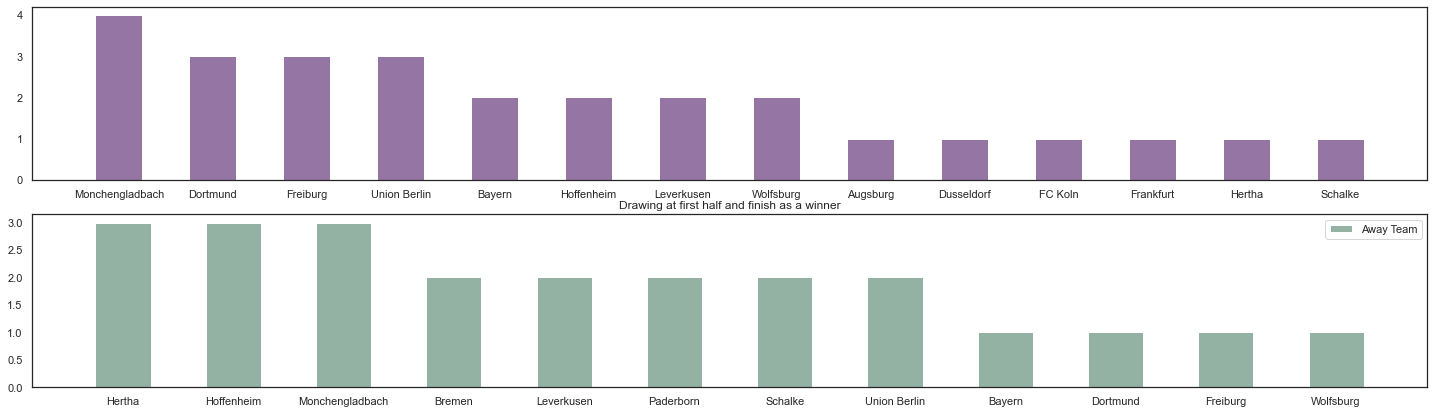

In [219]:

barWidth = 0.5
fig, ax = plt.subplots(2, 1,figsize=(25,7))
ax[0].bar(df3['home_team'], df3['final_result'], width = barWidth, color = (0.3,0.1,0.4,0.6), label='Home Team')
ax[1].bar(df4['away_team'], df4['final_result'], width = barWidth, color = (0.3,0.5,0.4,0.6), label='Away Team')

# Create legend
plt.legend()

plt.title('Drawing at first half and finish as a winner');

In [196]:
df5 = df[(df['final_result'] > df['1half_result']) & (df['1half_result'] == -1)].groupby(by='home_team').count()[['final_result']].reset_index().sort_values(by='final_result', ascending=False)

In [204]:
df6 = df[(df['final_result'] < df['1half_result']) & (df['1half_result'] == 1)].groupby(by='away_team').count()[['final_result']].reset_index().sort_values(by='final_result', ascending=False)

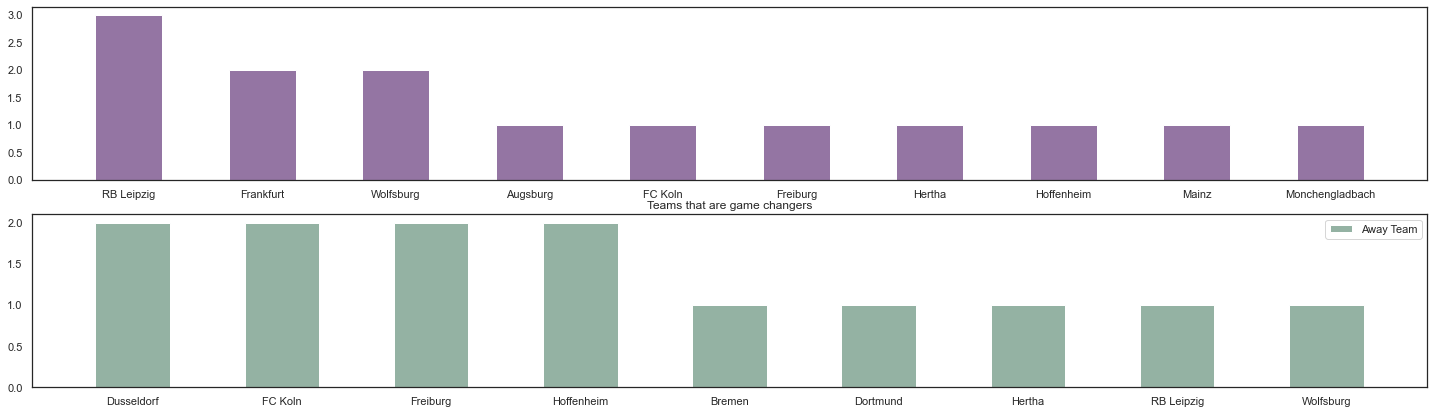

In [220]:
barWidth = 0.5
fig, ax = plt.subplots(2, 1, figsize=(25,7))
ax[0].bar(df5['home_team'], df5['final_result'], width = barWidth, color = (0.3,0.1,0.4,0.6), label='Home Team')
ax[1].bar(df6['away_team'], df6['final_result'], width = barWidth, color = (0.3,0.5,0.4,0.6), label='Away Team')

# Create legend
plt.legend()

plt.title('Teams that are game changers');

qntos jogos que no primeiro tempo tava um resultado e mudaram pra outro no final

In [223]:
df[(df['1half_result'] != df['final_result'])]

,round,home_team,away_team,goals_home_final,goals_away_final,final_result,goals_home_1half,goals_away_1half,1half_result,ball_possessionhome,ball_possessionaway,goal_attemptshome,goal_attemptsaway,shots_on_goalhome,shots_on_goalaway,shots_off_goalhome,shots_off_goalaway,blocked_shotshome,blocked_shotsaway,free_kickshome,free_kicksaway,corner_kickshome,corner_kicksaway,offsideshome,offsidesaway,throw_inshome,throw_insaway,goalkeeper_saveshome,goalkeeper_savesaway,foulshome,foulsaway,yellow_cardshome,yellow_cardsaway,total_passeshome,total_passesaway,tackleshome,tacklesaway,attackshome,attacksaway,dangerous_attackshome,dangerous_attacksaway,red_cardshome,red_cardsaway,completed_passeshome,completed_passesaway
4,26,Hoffenheim,Hertha,0,3,-1,0,0,0,51,49,6,4,0,2,4,2,2,0,12,4,2,3,0,0,11.0,8.0,2,0,4,11,0.0,3.0,217.0,205.0,9.0,5.0,53,43,34,30,0.0,0.0,0.0,0.0
6,25,Bayern,Augsburg,2,0,1,0,0,0,77,23,2,3,0,1,1,0,1,2,5,3,6,2,0,2,0.0,0.0,1,0,3,3,0.0,0.0,404.0,122.0,10.0,7.0,84,38,39,12,0.0,0.0,0.0,0.0
9,25,Hertha,Bremen,2,2,0,1,2,-1,53,47,10,3,3,2,2,1,5,0,6,7,1,0,2,3,0.0,0.0,0,2,5,2,0.0,0.0,232.0,205.0,9.0,7.0,50,44,32,16,0.0,0.0,0.0,0.0
11,25,Schalke,Hoffenheim,1,1,0,1,0,1,46,54,9,1,3,0,2,1,4,0,4,4,2,1,0,0,0.0,0.0,0,2,4,4,0.0,0.0,229.0,268.0,4.0,4.0,18,15,39,18,0.0,0.0,0.0,0.0
14,24,Union Berlin,Wolfsburg,2,2,0,1,0,1,46,54,1,7,1,1,0,3,0,3,9,1,0,3,0,1,0.0,0.0,1,0,1,7,0.0,1.0,191.0,224.0,6.0,7.0,52,43,10,20,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,2,Hoffenheim,Bremen,3,2,1,0,1,-1,57,43,2,7,0,2,1,2,1,3,8,6,0,2,2,0,0.0,0.0,1,0,4,7,0.0,1.0,306.0,231.0,7.0,10.0,63,66,16,10,0.0,0.0,256.0,175.0
193,2,Mainz,Monchengladbach,1,3,-1,1,1,0,45,55,8,8,3,2,4,2,1,4,9,9,1,3,0,0,0.0,0.0,1,2,9,8,2.0,0.0,184.0,233.0,8.0,12.0,52,44,29,24,0.0,0.0,148.0,190.0
199,1,Dortmund,Augsburg,5,1,1,1,1,0,78,22,13,2,5,1,5,1,3,0,3,3,7,0,0,0,0.0,0.0,0,4,3,3,0.0,0.0,426.0,124.0,5.0,14.0,85,31,73,9,0.0,0.0,393.0,84.0
200,1,Freiburg,Mainz,3,0,1,0,0,0,50,50,10,11,3,3,6,3,1,5,6,3,4,4,0,1,0.0,0.0,3,3,3,6,0.0,3.0,199.0,206.0,10.0,5.0,42,49,25,36,0.0,0.0,145.0,159.0


# Export CSV

In [20]:
game_stats.to_csv('game_stats_clean.csv',index=False)